<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-Constants" data-toc-modified-id="Imports-and-Constants-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and Constants</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span><ul class="toc-item"><li><span><a href="#Load-the-loc_dict-(create-if-necessary)" data-toc-modified-id="Load-the-loc_dict-(create-if-necessary)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load the <code>loc_dict</code> (create if necessary)</a></span></li><li><span><a href="#Combine-to-pd.DataFrame" data-toc-modified-id="Combine-to-pd.DataFrame-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Combine to <code>pd.DataFrame</code></a></span></li></ul></li><li><span><a href="#Locations" data-toc-modified-id="Locations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Locations</a></span><ul class="toc-item"><li><span><a href="#Basic-Location-Stats" data-toc-modified-id="Basic-Location-Stats-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Basic Location Stats</a></span></li></ul></li><li><span><a href="#Create-Data-Splits" data-toc-modified-id="Create-Data-Splits-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create Data Splits</a></span><ul class="toc-item"><li><span><a href="#Create-country_indices-and-country_labels" data-toc-modified-id="Create-country_indices-and-country_labels-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Create <code>country_indices</code> and <code>country_labels</code></a></span></li><li><span><a href="#OOC-splits" data-toc-modified-id="OOC-splits-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>OOC splits</a></span></li><li><span><a href="#Incountry-splits" data-toc-modified-id="Incountry-splits-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Incountry splits</a></span></li><li><span><a href="#Urban-v.-Rural" data-toc-modified-id="Urban-v.-Rural-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Urban v. Rural</a></span></li></ul></li><li><span><a href="#Data-Analysis-by-Country" data-toc-modified-id="Data-Analysis-by-Country-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Analysis by Country</a></span><ul class="toc-item"><li><span><a href="#Size" data-toc-modified-id="Size-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Size</a></span></li><li><span><a href="#Wealthpooled" data-toc-modified-id="Wealthpooled-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Wealthpooled</a></span></li><li><span><a href="#Urban-v.-Rural" data-toc-modified-id="Urban-v.-Rural-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Urban v. Rural</a></span></li><li><span><a href="#Nightlights" data-toc-modified-id="Nightlights-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Nightlights</a></span></li><li><span><a href="#Households" data-toc-modified-id="Households-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Households</a></span></li></ul></li><li><span><a href="#Data-Analysis-by-Split" data-toc-modified-id="Data-Analysis-by-Split-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Analysis by Split</a></span><ul class="toc-item"><li><span><a href="#Wealthpooled" data-toc-modified-id="Wealthpooled-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Wealthpooled</a></span></li><li><span><a href="#Urban-v.-Rural" data-toc-modified-id="Urban-v.-Rural-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Urban v. Rural</a></span></li><li><span><a href="#Nightlights" data-toc-modified-id="Nightlights-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Nightlights</a></span></li></ul></li><li><span><a href="#All-Zero-NL" data-toc-modified-id="All-Zero-NL-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>All-Zero NL</a></span></li><li><span><a href="#Visualize-Images" data-toc-modified-id="Visualize-Images-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Visualize Images</a></span><ul class="toc-item"><li><span><a href="#Highest-wealth" data-toc-modified-id="Highest-wealth-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Highest wealth</a></span></li><li><span><a href="#Lowest-wealth" data-toc-modified-id="Lowest-wealth-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Lowest wealth</a></span></li></ul></li></ul></div>

Prerequisites:
1. Run the first couple of sections from `models/baselines_dhs.ipynb` to create `data/dhs_image_hists.npz`

# Imports and Constants

In [35]:
%load_ext autoreload
%autoreload 2
%matplotlib inline



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
from collections import defaultdict
import os
import pickle
from pprint import pprint
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

sys.path.append('/home/benabbes/africa_poverty-1.0/')
from batchers import batcher, dataset_constants
from data_analysis.create_folds import create_folds, verify_folds
from utils.geo_plot import setup_ax, plot_locs
from utils.general import colordisplay, load_npz
from utils.plot import boxplot_df, plot_image_by_band

In [37]:
os.environ['CUDA_VISIBLE_DEVICES'] = ''

FOLDS = ['A', 'B', 'C', 'D', 'E']
SPLITS = ['train', 'val', 'test']
BAND_ORDER = ['BLUE', 'GREEN', 'RED', 'SWIR1', 'SWIR2', 'TEMP1', 'NIR', 'NIGHTLIGHTS']
DATASET = '2009-17'

COUNTRIES =["angola", "benin", "burkina_faso", "cameroon", "cote_d_ivoire",
        "democratic_republic_of_congo", "ethiopia", "ghana", "guinea", "kenya",
        "lesotho", "malawi", "mali", 
        "mozambique", "nigeria", "madagascar",
        "rwanda", "senegal", "sierra leone",
        "tanzania", "togo", "uganda", "zambia", "zimbabwe"]
print(COUNTRIES)
print(len(COUNTRIES))

['angola', 'benin', 'burkina_faso', 'cameroon', 'cote_d_ivoire', 'democratic_republic_of_congo', 'ethiopia', 'ghana', 'guinea', 'kenya', 'lesotho', 'malawi', 'mali', 'mozambique', 'nigeria', 'madagascar', 'rwanda', 'senegal', 'sierra leone', 'tanzania', 'togo', 'uganda', 'zambia', 'zimbabwe']
24


# Load data

In [18]:
file_path = '/home/benabbes/data1/dhs_image_hists2000.npz'
npz = load_npz(file_path)

labels = npz['labels']
locs = npz['locs']

years = npz['years']
nls_center = npz['nls_center']
nls_mean = npz['nls_mean']
num_examples = len(labels)
assert np.all(np.asarray([len(labels), len(locs), len(years)]) == num_examples)

dmsp_mask = years < 2012
viirs_mask = ~dmsp_mask

image_hists: dtype=int64, shape=(35928, 8, 102)
labels: dtype=float32, shape=(35928,)
locs: dtype=float32, shape=(35928, 2)
years: dtype=int32, shape=(35928,)
nls_center: dtype=float32, shape=(35928,)
nls_mean: dtype=float32, shape=(35928,)


## Load the `loc_dict` (create if necessary)

In [19]:
df_data = []
for label, loc, nl_mean, nl_center in zip(labels, locs, nls_mean, nls_center):
    lat, lon = loc   
            
    row = [lat, lon, label, nl_mean, nl_center]
    df_data.append(row)
df = pd.DataFrame.from_records(
    df_data,
    columns=['lat', 'lon', 'label', 'nl_mean', 'nl_center'])
print(df)

df.to_csv('df12.csv', index=False)





             lat        lon     label   nl_mean  nl_center
0     -12.350257  13.534922  2.351769  2.484787   3.312401
1     -12.360865  13.551494  2.044200  3.169744   4.776166
2     -12.613421  13.413085  0.894146  2.091084   2.178963
3     -12.581454  13.397711  1.085497  3.465860   5.873735
4     -12.578135  13.418748  1.778982  2.972868   4.744239
...          ...        ...       ...       ...        ...
35923 -17.915289  31.156115  0.171987 -0.020666  -0.105641
35924 -18.379501  31.872288  0.320736 -0.212271  -0.194670
35925 -16.660612  29.850649 -0.268766 -0.216926  -0.213470
35926 -17.914251  30.956976  1.417354  1.202461   2.549902
35927 -17.859114  31.797626 -0.011605 -0.218385  -0.218173

[35928 rows x 5 columns]


`loc_dict` has the format:
```python
{
    (lat, lon): {
        'cluster': 1,
        'country': 'malawi',
        'country_year': 'malawi_2012',  # surveyID
        'households': 25,
        'urban': False,
        'wealth': -0.513607621192932,
        'wealthpooled': -0.732255101203918,
        'year': 2012
    }, ...
}
```

NOTE: `year` and `country_year` might differ in the year. `country_year` is the survey ID, which says which year the survey started. However, sometimes the DHS surveys cross the year-boundary, in which case `country_year` will remain the same but `year` will be the next year.

In [6]:
def create_loc_dict(loc_dict_path):
    '''
    Args
    - loc_dict_path: str, path to save the loc_dict
    '''
    surveys_df = pd.read_csv('/home/benabbes//data1/Wealth2000F.csv', float_precision='low')
 
    surveys_df.rename({'LATNUM': 'lat', 'LONGNUM': 'lon', 'URBAN_RURA': 'urban'},
                      axis='columns', inplace=True)
    

    for col in ['lat', 'lon', 'wealthpooled']:
        surveys_df[col] = surveys_df[col].astype(np.float32)
        surveys_df['country'] = (surveys_df['country']
                             .str.lower())
                             

    loc_dict = {}
    for (lat, lon) in locs:
        loc = (lat, lon)        
        row = surveys_df.loc[(surveys_df['lat'] == lat) & (surveys_df['lon'] == lon), :]
        print(len(row))
        assert len(row) == 1, loc
        row = row.iloc[0]
       

        #cy = '{c}_{y}'.format(c=row['country'], y=row['svyid'][-4:])

        assert loc not in loc_dict
        loc_dict[loc] = {
            'cluster': row['cluster'],
            'country': row['country'],
            'households': row['households'],
            'urban': row['urban'] ,
            'year': row['year']
        }

    with open(loc_dict_path, 'wb') as f:
        pickle.dump(loc_dict, f)

In [20]:
def create_loc_dict(loc_dict_path):
    '''
    Args
    - loc_dict_path: str, path to save the loc_dict
    '''
    surveys_df = pd.read_csv('/home/benabbes/data1/Wealth2000F.csv', float_precision='low')
    surveys_df.rename({'LATNUM': 'lat', 'LONGNUM': 'lon', 'URBAN_RURA': 'urban'},
                      axis='columns', inplace=True)
    for col in ['lat', 'lon', 'wealthpooled']:
        surveys_df[col] = surveys_df[col].astype(np.float32)
    surveys_df['country'] = (surveys_df['country']
                             .str.lower())
                             

    loc_dict = {}
    for (lat, lon) in locs:
        loc = (lat, lon)
        row = surveys_df.loc[(surveys_df['lat'] == lat) & (surveys_df['lon'] == lon), :]
        assert len(row) == 1 , loc
        row = row.iloc[0]

        #cy = '{c}_{y}'.format(c=row['country'], y=row['svyid'][-4:])

        assert loc not in loc_dict
        loc_dict[loc] = {
            'cluster': row['cluster'],
            'country': row['country'],
            'country_year': row['country_year'],
            'households': row['households'],
            'urban': row['urban'] ,
            'wealthpooled': row['wealthpooled'],
            'year': row['year']
        }

    with open(loc_dict_path, 'wb') as f:
        pickle.dump(loc_dict, f)

In [21]:
loc_dict_path = '/home/benabbes/data1/loc_dict2000.pkl'
print(loc_dict_path)

if not os.path.exists(loc_dict_path):
    create_loc_dict(loc_dict_path)

with open(loc_dict_path, 'rb') as f:
    loc_dict = pickle.load(f)
    print(loc_dict)
    
   
    
    

/home/benabbes/data1/loc_dict2000.pkl


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Combine to `pd.DataFrame`

In [22]:
df_data = []
for label, loc, nl_mean, nl_center in zip(labels, locs, nls_mean, nls_center):
    lat, lon = loc
    loc_info = loc_dict[(lat, lon)]
    country = loc_info['country']
    year = loc_info['year']
    country_year=loc_info['country_year']
    urban = loc_info['urban']
    household = loc_info['households']
    row = [lat, lon, label, country, year,country_year, urban, nl_mean, nl_center, household]
    df_data.append(row)
df = pd.DataFrame.from_records(
    df_data,
    columns=['lat', 'lon', 'wealthpooled', 'country', 'year','country_year', 'urban', 'nl_mean', 'nl_center', 'households'])

In [23]:
with pd.option_context('display.max_rows', 30):
    display(df)
    
    df.to_csv('test244.csv', index=False)

    

,lat,lon,wealthpooled,country,year,country_year,urban,nl_mean,nl_center,households
0,-12.350257,13.534922,2.351769,angola,2011,angola_2011,1,2.484787,3.312401,36
1,-12.360865,13.551494,2.044200,angola,2011,angola_2011,1,3.169744,4.776166,32
2,-12.613421,13.413085,0.894146,angola,2011,angola_2011,1,2.091084,2.178963,36
3,-12.581454,13.397711,1.085497,angola,2011,angola_2011,1,3.465860,5.873735,35
4,-12.578135,13.418748,1.778982,angola,2011,angola_2011,1,2.972868,4.744239,37
...,...,...,...,...,...,...,...,...,...,...
35923,-17.915289,31.156115,0.171987,zimbabwe,2015,zimbabwe_2015,1,-0.020666,-0.105641,24
35924,-18.379501,31.872288,0.320736,zimbabwe,2015,zimbabwe_2015,0,-0.212271,-0.194670,25
35925,-16.660612,29.850649,-0.268766,zimbabwe,2015,zimbabwe_2015,0,-0.216926,-0.213470,28
35926,-17.914251,30.956976,1.417354,zimbabwe,2015,zimbabwe_2015,1,1.202461,2.549902,25


# Locations

## Basic Location Stats

Lat. min: -30.588812, max: 20.175791
Lon. min: -17.498482, max: 50.313255

maximum side_lat: 0.060570
maximum side_lon: 0.070361


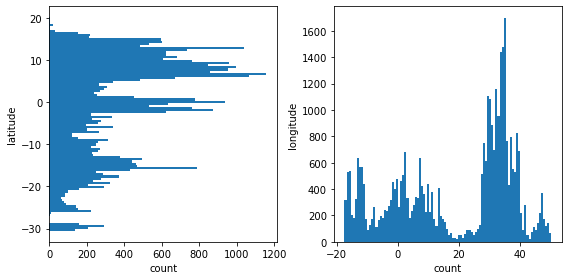

In [24]:
RADIUS_EARTH = 6356.7523  # in km, polar radius of Earth

def get_lon_for_distance(lat, d):
    '''Calculates the degrees longitude for some East-West distance at a given latitude.

    Makes (incorrect) assumption that Earth is a perfect sphere.
    Uses the smaller polar radius (instead of equatorial radius), so
        actual degrees longitude <= returned value

    Args
    - lat: numeric, latitude in degrees
    - d: numeric, distance in km

    Returns
    - lon: float, approximate degrees longitude
    '''
    lat = np.abs(lat) * np.pi / 180.0  # convert to radians
    r = RADIUS_EARTH * np.cos(lat)  # radius at the given lat
    lon = d / r
    lon = lon * 180.0 / np.pi  # convert to degrees
    return lon

def get_lat_for_distance(d):
    '''Calculates the degrees latitude for some North-South distance.

    Makes (incorrect) assumption that Earth is a perfect sphere.
    Uses the smaller polar radius (instead of equatorial radius), so
        actual degrees latitude <= returned value

    Args
    - d: numeric, distance in km

    Returns
    - lat: float, approximate degrees latitude
    '''
    lat = d / RADIUS_EARTH  # in radians
    lat = lat * 180.0 / np.pi  # convert to degrees
    return lat

def print_loc_stats(locs):
    '''
    Args
    - locs: np.array, shape [N, 2], each row is [lat, lon] in degrees
        assumes lat values are + for N, - for S
        assumes lon values are + for E, - for W
    '''
    min_lat, min_lon = np.min(locs, axis=0)
    max_lat, max_lon = np.max(locs, axis=0)
    print(f'Lat. min: {min_lat:.6f}, max: {max_lat:.6f}')
    print(f'Lon. min: {min_lon:.6f}, max: {max_lon:.6f}')
    print()

    # get maximum lat/lon side-lengths for a 224x224 pixel image at 30m / px
    side_distance = 224 * 30 / 1000
    farthest_lat = max(abs(min_lat), abs(max_lat))
    side_lat = get_lat_for_distance(d=side_distance)
    side_lon = get_lon_for_distance(lat=farthest_lat, d=side_distance)
    print(f'maximum side_lat: {side_lat:.6f}')
    print(f'maximum side_lon: {side_lon:.6f}')

def plot_locs_histogram(locs):
    # plot histogram of locations
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[8, 4])

    # latitudes
    axs[0].hist(locs[:, 0], bins=100, orientation='horizontal')
    axs[0].set(xlabel='count', ylabel='latitude')

    # longitudes
    axs[1].hist(locs[:, 1], bins=100, orientation='vertical')
    axs[1].set(xlabel='count', ylabel='longitude')

    fig.tight_layout()
    plt.show()

print_loc_stats(locs)
plot_locs_histogram(locs)

/home/benabbes/miniconda3/envs/py37/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/benabbes/miniconda3/envs/py37/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


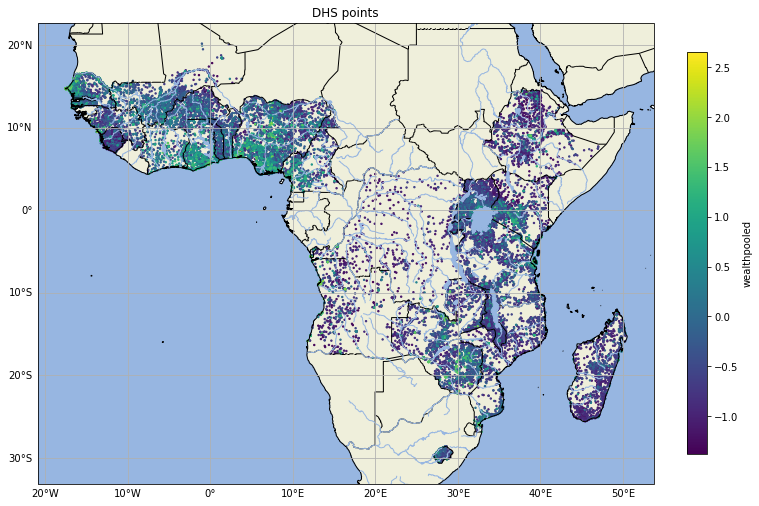

In [25]:
_ = plot_locs(locs=locs, colors=labels, figsize=[12, 13],
              title='DHS points', cbar_label='wealthpooled')
plt.savefig('alinew.png')

# Create Data Splits

In [26]:
def plot_splits(locs_dict, title=None):
    '''
    Args
    - locs_dict: dict, label (str) => np.array of lat, lon
    '''
    fig = plt.figure(figsize=[15, 15])
    ax = setup_ax(fig)

    for label, locs_array in locs_dict.items():
        ax.scatter(locs_array[:, 1], locs_array[:, 0], label=label, s=2)

    lgd = ax.legend()
    for handle in lgd.legendHandles:
        handle.set_sizes([50.0])

    if title is not None:
        ax.set_title(title)
    plt.show()

## Create `country_indices` and `country_labels`

`country_indices` is a dictionary that maps a country name to a sorted `np.array` of its indices
```python
{ 'malawi': np.array([ 8530,  8531,  8532, ..., 10484, 10485, 10486]), ... }
```

`country_labels` is a `np.array` that shows which country each example belongs to
```python
np.array([0, 0, 0, 0, ..., 22, 22, 22])
```
where countries are indexed by their position in `dataset_constants.DHS_COUNTRIES`

In [38]:
print(len(locs))

country_indices = defaultdict(list)  # country => np.array of indices

country_labels = np.zeros(len(locs), dtype=np.int32)  # np.array of country labels


for i, loc in enumerate(locs):
    country = loc_dict[tuple(loc)]['country']
    
    country_indices[country].append(i)
    
    
values=["angola", "benin", "burkina_faso", "cameroon", "cote_d_ivoire",
        "democratic_republic_of_congo", "ethiopia", "ghana", "guinea", "kenya",
        "lesotho", "malawi", "mali", 
        "mozambique", "nigeria", "madagascar",
        "rwanda", "senegal", "sierra_leone",
        "tanzania", "togo", "uganda", "zambia", "zimbabwe"]

for i, country in enumerate(values):
    country_indices[country] = np.asarray(country_indices[country])
    indices = country_indices[country]
    country_labels[indices] = i
    print(country)

35928
angola
benin
burkina_faso
cameroon
cote_d_ivoire
democratic_republic_of_congo
ethiopia
ghana
guinea
kenya
lesotho
malawi
mali
mozambique
nigeria
madagascar
rwanda
senegal
sierra_leone
tanzania
togo
uganda
zambia
zimbabwe


## OOC splits

In [39]:
# 'A': {
#     'train': np.array([1, 10, 13, ...]),
#     ...
# }
ooc_folds = {
    f: {split: [] for split in SPLITS}
    for f in FOLDS
}

for f in FOLDS:
    
    surveys_dict = dataset_constants.SURVEY_NAMES[f'2009-17{f}']
    
    for split, countries in surveys_dict.items():
        print(split)
        
        split_indices = np.sort(np.concatenate([
            country_indices[country] for country in countries
        ]))
        ooc_folds[f][split] = split_indices
        
pprint({
    f: {split: len(ooc_folds[f][split])
        for split in SPLITS}
    for f in ooc_folds
})



train
val
test
train
val
test
train
val
test
train
val
test
train
val
test
{'A': {'test': 7252, 'train': 21564, 'val': 7112},
 'B': {'test': 7112, 'train': 21525, 'val': 7291},
 'C': {'test': 7291, 'train': 21431, 'val': 7206},
 'D': {'test': 7206, 'train': 21655, 'val': 7067},
 'E': {'test': 7067, 'train': 21609, 'val': 7252}}


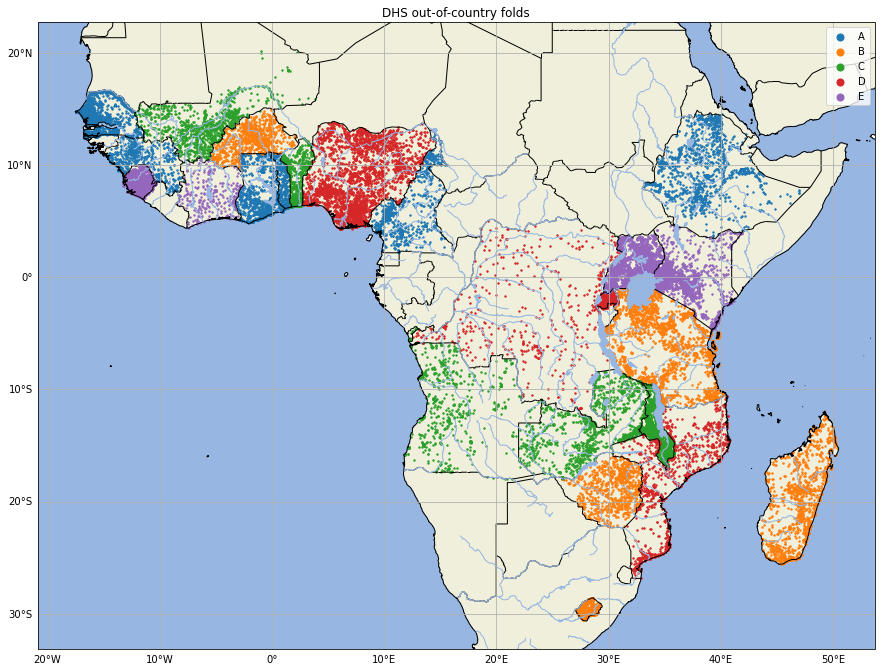

In [42]:
_ =plot_splits({f: locs[ooc_folds[f]['test']] for f in FOLDS},
            title='DHS out-of-country folds')



## Incountry splits

Maximum side lengths in degrees lat/lon of a 224x224 px image at 30m/px

```
maximum side_lat: 0.060570
maximum side_lon: 0.070361
```

In [43]:
print(FOLDS)

['A', 'B', 'C', 'D', 'E']


In [44]:
def create_incountry_folds(locs, folds_path):
    '''
    Args
    - locs: np.array, shape [N, 2], each row is [lat, lon]
    - folds_path: str, path to save incountry folds dict
    '''
    MIN_DIST = 0.092841  # sqrt(0.060570**2 + 0.070361**2)
    DIST_METRIC = 'euclidean'
    MAX_INDEX = 20544

    locs_to_indices, test_folds = create_folds(
        locs, min_dist=MIN_DIST, dist_metric=DIST_METRIC, fold_names=FOLDS,
        plot_largest_clusters=5)
    verify_folds(test_folds, locs=locs, min_dist=MIN_DIST,
                 dist_metric=DIST_METRIC, max_index=MAX_INDEX)

    print('Size of each fold')
    pprint({f: len(indices) for f, indices in test_folds.items()})

    # create train/val/test splits
    folds = {}
    for i, f in enumerate(FOLDS):
        folds[f] = {}
        folds[f]['test'] = test_folds[f]

        val_f = FOLDS[(i+1) % 5]
        folds[f]['val'] = test_folds[val_f]

        train_fs = [FOLDS[(i+2) % 5], FOLDS[(i+3) % 5], FOLDS[(i+4) % 5]]
        print(train_fs)
        folds[f]['train'] = np.sort(np.concatenate([test_folds[f] for f in train_fs]))

    if os.path.exists(folds_path):
        with open(folds_path, 'rb') as f:
            existing_folds = pickle.load(f)
        for f in FOLDS:
            for s in SPLITS:
                assert np.array_equal(folds[f][s], existing_folds[f][s])
    else:
        with open(folds_path, 'wb') as f:
            pickle.dump(folds, f)

    

In [45]:
incountry_folds_path = '/home/benabbes/Ali/data/dhs_incountry_folds2019.pkl'


with open(incountry_folds_path, 'rb') as f:
    incountry_folds = pickle.load(f)


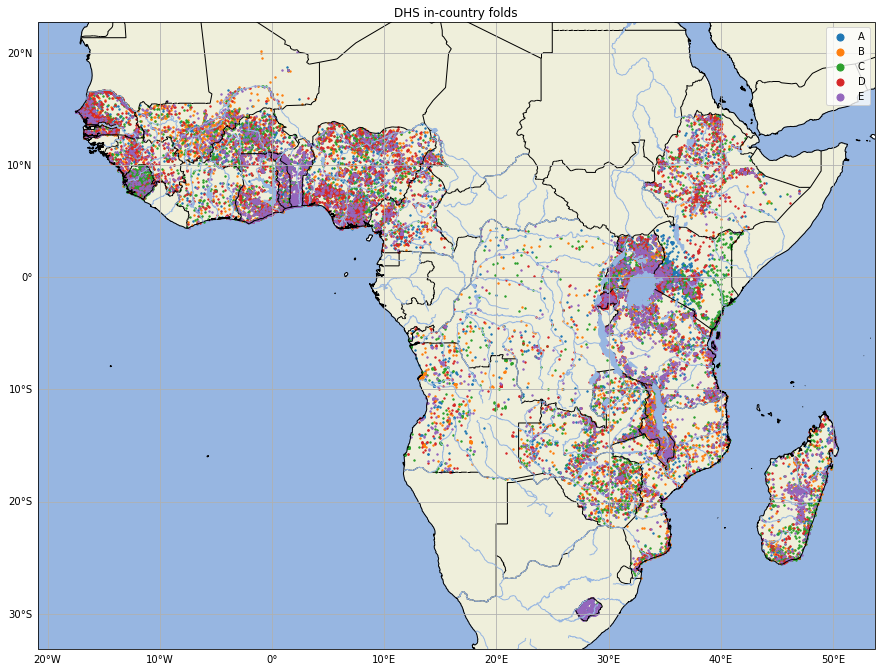

<Figure size 432x288 with 0 Axes>

In [46]:
plot_splits({f: locs[incountry_folds[f]['test']] for f in FOLDS},
            title='DHS in-country folds')
plt.savefig("ali26.png")

In [47]:
countries =["angola", "benin", "burkina_faso", "cameroon", "cote_d_ivoire",
        "democratic_republic_of_congo", "ethiopia", "ghana", "guinea", "kenya",
        "lesotho", "malawi", "mali", 
        "mozambique", "nigeria", "madagascar",
        "rwanda", "senegal", "sierra leone",
        "tanzania", "togo", "uganda", "zambia", "zimbabwe"]

In [48]:
def plot_counts(folds, countries, country_indices):
    '''
    Args
    - folds: dict, folds[f][split] is a np.array of indices
    - countries: list of str, names of countries
    - country_indices: dict, country (str) => np.array of indices
    '''
    counts = np.zeros([len(countries), len(FOLDS)], dtype=np.float32)
    for i, country in enumerate(countries):
        idxs = country_indices[country]
        for j, f in enumerate(FOLDS):
            counts[i, j] = len(np.intersect1d(folds[f]['test'], idxs))
    counts /= np.sum(counts, axis=1, keepdims=True)
    folds_df = pd.DataFrame(data=counts, columns=FOLDS, index=countries)

    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    folds_df.plot.barh(ax=ax, stacked=True, width=0.8)
    ax.set_xlabel('fraction')
    fig.tight_layout()
    

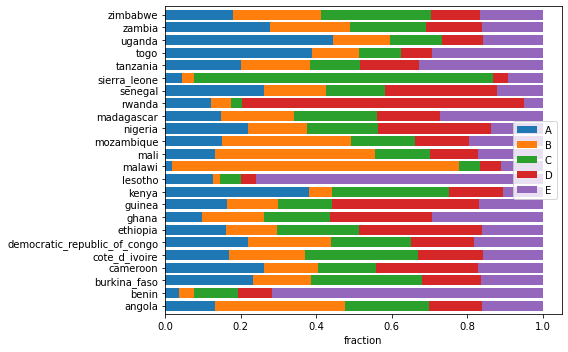

In [49]:
plot_counts(folds=incountry_folds,
            countries=values,
            country_indices=country_indices)

# as a sanity check, each country in `ooc_folds` should have a single solid color
# plot_counts(folds=ooc_folds,
#             countries=dataset_constants.DHS_COUNTRIES,
#             country_indices=country_indices)

plt.savefig("ali25.png")

## Urban v. Rural

In [50]:
def get_urban_rural_indices(locs, loc_dict):
    '''
    Args
    - locs: np.array, shape [N, 2]
    - loc_dict: dict, maps (lat, lon) => dict of info

    Returns
    - urban_indices: np.array, shape [num_urban]
    - rural_indices: np.array, shape [num_rural]
    '''
    urban_indices = []
    rural_indices = []

    for i, loc in enumerate(locs):
        loc = tuple(loc)
        if loc_dict[loc]['urban'] == 0:
            rural_indices.append(i)
        else:
            urban_indices.append(i)
    urban_indices = np.asarray(urban_indices)
    rural_indices = np.asarray(rural_indices)
    print('num urban: {}\t num rural: {}'.format(len(urban_indices), len(rural_indices)))
    return urban_indices, rural_indices

urban_indices, rural_indices = get_urban_rural_indices(locs, loc_dict)

num urban: 12507	 num rural: 23421


In [51]:
urban_counts = {}
rural_counts = {}

for f, splits in ooc_folds.items():
    urban_counts[f] = {}
    rural_counts[f] = {}
    for s, indices in splits.items():
        urban_counts[f][s] = len(np.intersect1d(urban_indices, indices))
        rural_counts[f][s] = len(np.intersect1d(rural_indices, indices))

for f in ooc_folds:
    urban_counts[f]['all'] = sum(urban_counts[f].values())
    rural_counts[f]['all'] = sum(rural_counts[f].values())

print('urban counts')
pprint(urban_counts)
print('rural counts')
pprint(rural_counts)

urban counts
{'A': {'all': 12507, 'test': 3046, 'train': 7452, 'val': 2009},
 'B': {'all': 12507, 'test': 2009, 'train': 7955, 'val': 2543},
 'C': {'all': 12507, 'test': 2543, 'train': 7379, 'val': 2585},
 'D': {'all': 12507, 'test': 2585, 'train': 7598, 'val': 2324},
 'E': {'all': 12507, 'test': 2324, 'train': 7137, 'val': 3046}}
rural counts
{'A': {'all': 23421, 'test': 4206, 'train': 14112, 'val': 5103},
 'B': {'all': 23421, 'test': 5103, 'train': 13570, 'val': 4748},
 'C': {'all': 23421, 'test': 4748, 'train': 14052, 'val': 4621},
 'D': {'all': 23421, 'test': 4621, 'train': 14057, 'val': 4743},
 'E': {'all': 23421, 'test': 4743, 'train': 14472, 'val': 4206}}


# Data Analysis by Country

In [52]:
pprint(COUNTRIES, compact=True)

YEARS = sorted(df['year'].unique())
pprint(YEARS, compact=True)

['angola', 'benin', 'burkina_faso', 'cameroon', 'cote_d_ivoire',
 'democratic_republic_of_congo', 'ethiopia', 'ghana', 'guinea', 'kenya',
 'lesotho', 'malawi', 'mali', 'mozambique', 'nigeria', 'madagascar', 'rwanda',
 'senegal', 'sierra leone', 'tanzania', 'togo', 'uganda', 'zambia', 'zimbabwe']
[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
 2016, 2017, 2018, 2019]


## Size

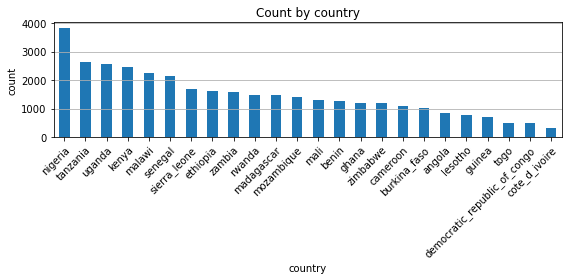

In [53]:
def plot_countries_by_size(df):
    counts = df.groupby('country').size()
    counts.sort_values(inplace=True, ascending=False)

    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    counts.to_frame().plot(kind='bar', ax=ax, legend=None)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right',
             rotation_mode='anchor')
    ax.set_ylabel('count')
    ax.set_title('Count by country')
    ax.grid(True, axis='y')
    fig.tight_layout()
    plt.show()

plot_countries_by_size(df)


In [54]:
with pd.option_context('display.max_rows', 100):
    counts_series = df.groupby(['country', 'year']).size().rename('count')
    display(counts_series.to_frame())

count
country                      year       
angola                       2011    229
                             2015    624
benin                        2012    745
                             2017    539
burkina_faso                 2010    540
                             2014    247
                             2017    223
cameroon                     2004     82
                             2011    575
                             2018    429
cote_d_ivoire                2012    340
democratic_republic_of_congo 2013    491
ethiopia                     2005    134
                             2011    570
                             2016    621
                             2019    304
ghana                        2008    402
                             2014    421
                             2016    191
                             2019    191
guinea                       2012    299
                             2018    400
kenya                        2003    250
                             2008    396
                             2014   1584
                             2015    244
lesotho                      2009    394
                             2014    398
madagascar                   2008    584
                             2011    265
                             2013    273
                             2016    357
malawi                       2004    164
                             2010    826
                             2012    139
                             2014    139
                             2015    849
                             2017    147
mali                         2006    404
                             2012    413
                             2015    176
                             2018    327
mozambique                   2009    269
                             2011    608
                             2015    305
                             2018    221
nigeria                      2003    117
                             2008    885
                             2010    238
                             2013    888
                             2015    321
                             2018   1382
rwanda                       2010    491
                             2015    491
                             2019    499
senegal                      2008    317
                             2010    384
                             2012    199
                             2014    196
                             2015    213
                             2016    213
                             2017    399
                             2018    213
sierra_leone                 2008    349
                             2013    434
                             2016    335
                             2019    556
tanzania                     2003    107
                             2007    465
                             2010    457
                             2012    573
                             2015    607
                             2017    435
togo                         2013    329
                             2017    170
uganda                       2006    335
                             2009    169
                             2011    869
                             2014    207
                             2016    684
                             2018    315
zambia                       2007    318
                             2013    718
                             2018    534
zimbabwe                     2005    396
                             2010    392
                             2015    399

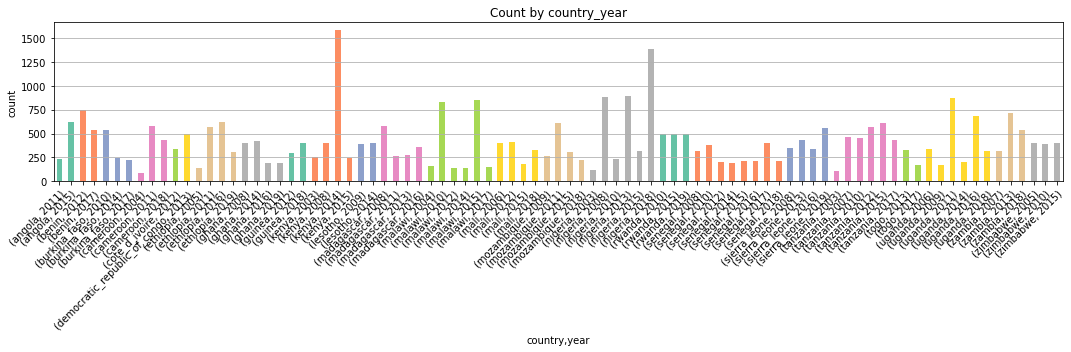

In [55]:
def plot_cy_by_size(df, country_year_colors):
    fig, ax = plt.subplots(1, 1, figsize=[15, 5])
    df.groupby(['country', 'year']).size().plot(
        kind='bar', ax=ax, color=country_year_colors)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
    ax.set_ylabel('count')
    ax.set_title('Count by country_year')
    ax.grid(True, axis='y')
    fig.tight_layout()
    plt.show()

country_year_index = df.groupby(['country', 'year']).size().index
CMAP_FN = plt.cm.get_cmap('Set2')
COUNTRY_YEAR_COLORS = [CMAP_FN.colors[i % 8] for i in country_year_index.codes[0]]
plot_cy_by_size(df, COUNTRY_YEAR_COLORS)

## Wealthpooled

In [56]:
df_country = df.groupby('country')['wealthpooled'].describe()
colordisplay(df_country)
df_country.to_csv('/home/benabbes/surveys.csv')


,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
angola,853.000000,0.111994,1.095196,-1.367198,-0.916950,-0.148466,1.156083,2.351769
benin,1284.000000,0.123368,0.690910,-1.092647,-0.431875,-0.061015,0.664546,1.903070
burkina_faso,1010.000000,-0.119930,0.635326,-1.247470,-0.579518,-0.299412,0.155988,2.209569
cameroon,1086.000000,0.460415,0.896563,-1.203008,-0.420807,0.591771,1.180984,2.547349
cote_d_ivoire,340.000000,0.436980,0.753580,-1.145196,-0.246538,0.474012,1.078480,2.147961
democratic_republic_of_congo,491.000000,-0.648201,0.697775,-1.308059,-1.069065,-0.914780,-0.572953,1.882778
ethiopia,1629.000000,-0.237875,0.942353,-1.381986,-1.002910,-0.730004,0.776727,2.136964
ghana,1205.000000,0.660517,0.739999,-1.194038,0.145234,0.751387,1.267159,2.080768
guinea,699.000000,0.143565,0.836895,-1.160792,-0.527261,-0.166438,0.915615,2.296787


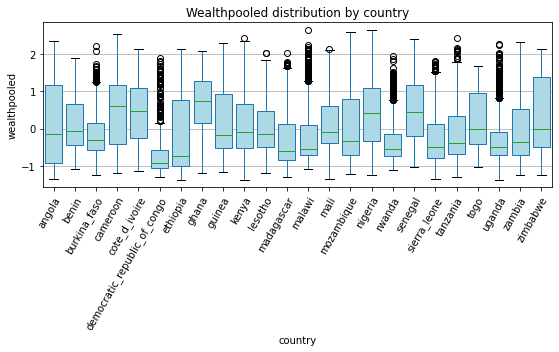

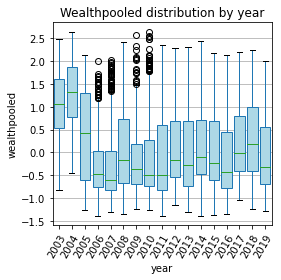

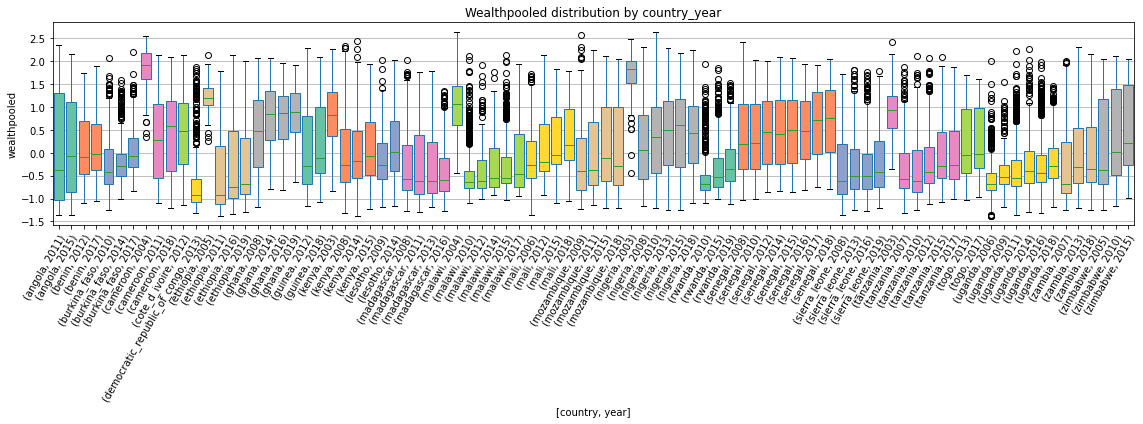

In [94]:
boxplot_df(df, y='wealthpooled', by='country',
           figsize=(8, 5), ylabel='wealthpooled', 
           title='Wealthpooled distribution by country', 
           colors=['lightblue' for _ in values])

boxplot_df(df, y='wealthpooled', by='year',
           figsize=(4, 4), ylabel='wealthpooled',
           title='Wealthpooled distribution by year',
           colors=['lightblue' for _ in YEARS])

boxplot_df(df, y='wealthpooled', by=['country', 'year'],
           figsize=(16, 6), ylabel='wealthpooled',
           title='Wealthpooled distribution by country_year',
           colors=COUNTRY_YEAR_COLORS)

## Urban v. Rural

In [58]:
def plot_urban_rural(df, by, color=None, title=None, figsize=(10, 5)):
    '''
    Args
    - df: pd.DataFrame
    - by: str or list of str, column(s) to group by
    - color: list of colors
    - title: str
    '''
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    urban_series = df.groupby(by)['urban'].mean()
    if color is None:
        urban_series.plot(kind='bar', ax=ax, width=0.8)
    else:
        urban_series.plot(kind='bar', ax=ax, color=color, width=0.8)
    plt.setp(ax.get_xticklabels(), rotation=60, ha='right',
             rotation_mode='anchor')
    if title is not None:
        ax.set_title(title)
    ax.grid(True, axis='y')
    ax.set_ylabel('fraction urban')
    fig.tight_layout()

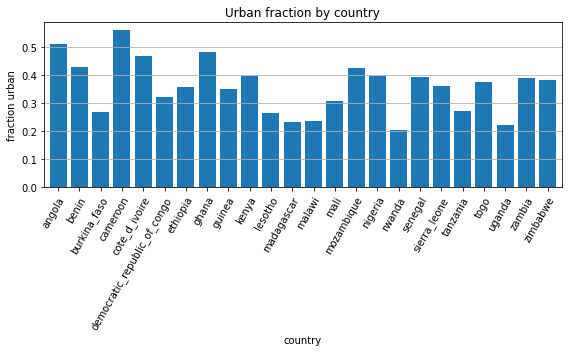

In [59]:
plot_urban_rural(df, by='country', title='Urban fraction by country', figsize=(8, 5))

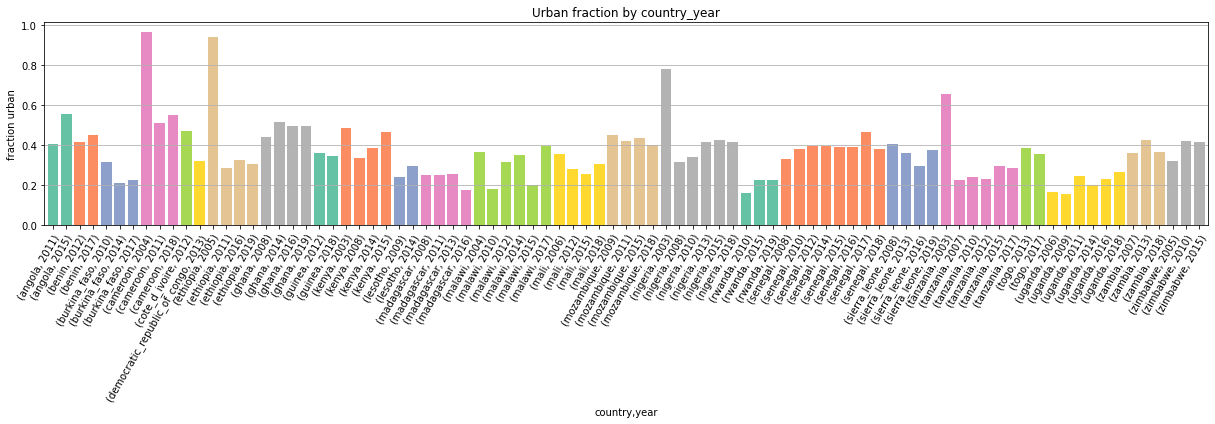

In [92]:
plot_urban_rural(df, by=['country', 'year'],
                 color=COUNTRY_YEAR_COLORS,
                 title='Urban fraction by country_year',
                 figsize=(17, 6))

## Nightlights

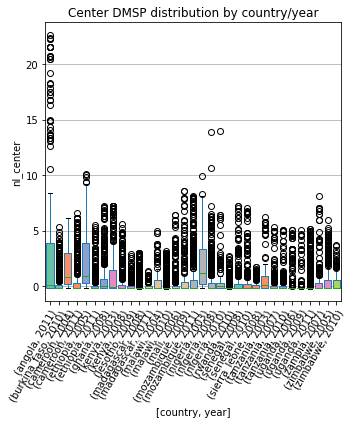

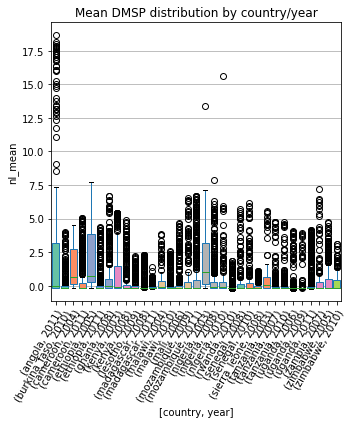

In [61]:
boxplot_df(df[dmsp_mask], y='nl_center', by=['country', 'year'],
           figsize=(5, 6), ylabel='nl_center',
           title='Center DMSP distribution by country/year',
           colors=COUNTRY_YEAR_COLORS)

boxplot_df(df[dmsp_mask], y='nl_mean', by=['country', 'year'],
           figsize=(5, 6), ylabel='nl_mean',
           title='Mean DMSP distribution by country/year',
           colors=COUNTRY_YEAR_COLORS)

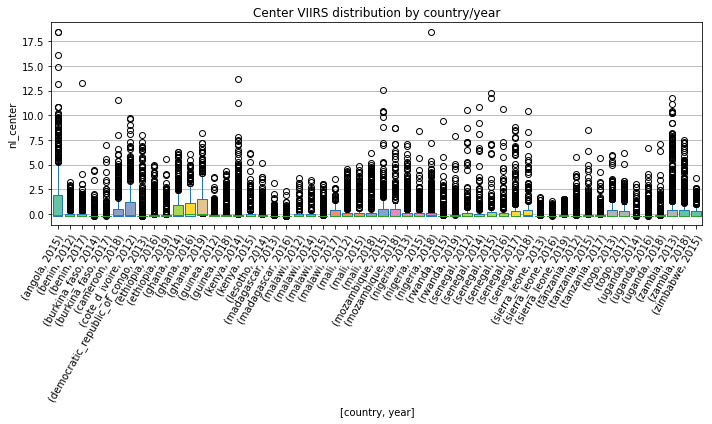

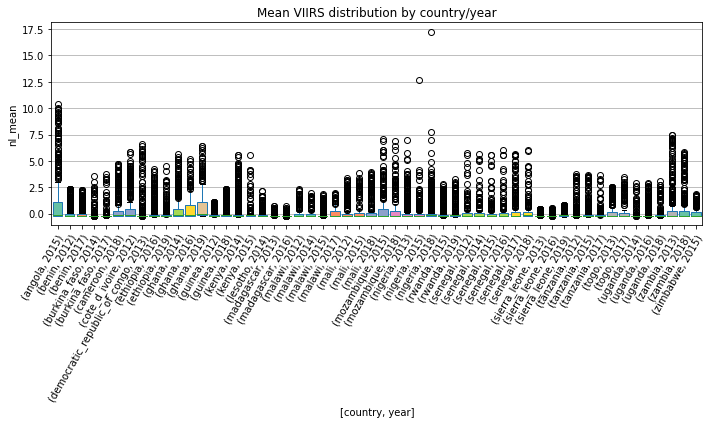

In [62]:
boxplot_df(df[viirs_mask], y='nl_center', by=['country', 'year'],
           figsize=(10, 6), ylabel='nl_center',
           title='Center VIIRS distribution by country/year',
           colors=COUNTRY_YEAR_COLORS)

boxplot_df(df[viirs_mask], y='nl_mean', by=['country', 'year'],
           figsize=(10, 6), ylabel='nl_mean',
           title='Mean VIIRS distribution by country/year',
           colors=COUNTRY_YEAR_COLORS)

## Households

In [63]:
np.mean(df['households'] < 16)

0.03543197506123358

,count,mean,std,min,0%,1%,2%,3%,4%,5%,...,91%,92%,93%,94%,95%,96%,97%,98%,99%,max
households,35928.0,25.318053,6.330077,1.0,1.0,2.0,8.0,14.0,16.0,17.0,...,32.0,33.0,34.0,34.0,36.0,38.0,40.0,41.0,44.0,48.0


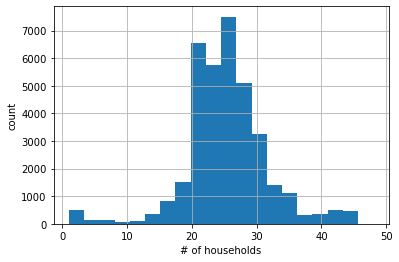

In [64]:
ax = df['households'].plot.hist(bins=20, grid=True)
_ = ax.set(xlabel='# of households', ylabel='count')
display(df['households'].describe(percentiles=np.arange(0, 1, 0.01)).to_frame().T)

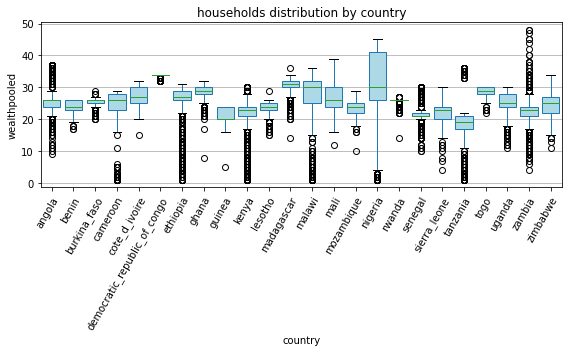

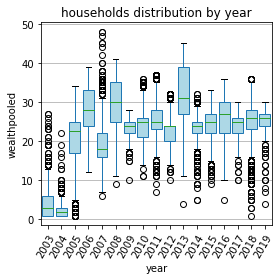

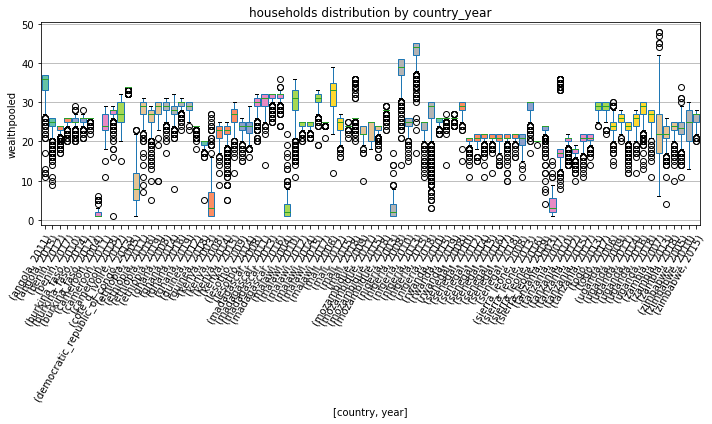

In [65]:
boxplot_df(df, y='households', by='country',
           figsize=(8, 5), ylabel='wealthpooled',
           title='households distribution by country',
           colors=['lightblue' for _ in values])

boxplot_df(df, y='households', by='year',
           figsize=(4, 4), ylabel='wealthpooled',
           title='households distribution by year',
           colors=['lightblue' for _ in YEARS])

boxplot_df(df, y='households', by=['country', 'year'],
           figsize=(10, 6), ylabel='wealthpooled',
           title='households distribution by country_year',
           colors=COUNTRY_YEAR_COLORS)

# Data Analysis by Split

## Wealthpooled

In [66]:
def plot_labels_by_fold(labels, folds, title=None):
    '''
    Args
    - labels: np.array, shape [N], type float32
    - folds: dict, folds[f][split] is a np.array of indices
    - title: str, figure title
    '''
    fig, axs = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(7, 2.5))
    for f, ax in zip(FOLDS, axs.flat):
        data = [labels[folds[f][split]] for split in SPLITS]
        ax.boxplot(data, patch_artist=True, widths=0.8)

        # add x-tick labels
        plt.setp(ax, xticks=[1, 2, 3], xticklabels=SPLITS)

        ax.grid(True, axis='y')
        ax.set_title(f'Fold: {f}')

    axs[0].set_ylabel('wealthpooled')
    if title is not None:
        fig.suptitle(title, y=1.03)
    fig.tight_layout()

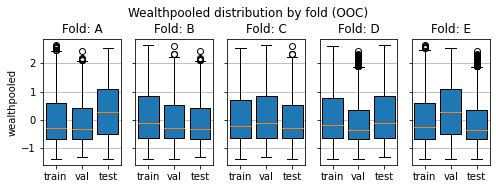

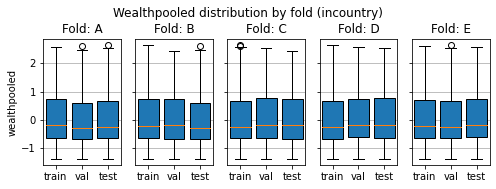

In [67]:
plot_labels_by_fold(labels, ooc_folds, title='Wealthpooled distribution by fold (OOC)')
plot_labels_by_fold(labels, incountry_folds, title='Wealthpooled distribution by fold (incountry)')

In [68]:
def plot_label_hists(labels, folds, title=None):
    '''
    Args
    - labels: np.array, shape [N], type float32
    - folds: dict, folds[f][split] is a np.array of indices
    - title: str, figure title
    '''
    fig, axs = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(10, 2.5))
    LABEL_BIN_EDGES = np.arange(-1.5, 3.0, 0.1)
    bin_centers = np.convolve(LABEL_BIN_EDGES, [.5, .5], mode='valid')

    for f, ax in zip(FOLDS, axs.flat):
        for split in SPLITS:
            label_hist, _ = np.histogram(a=labels[folds[f][split]], bins=LABEL_BIN_EDGES)
            ax.plot(bin_centers, label_hist / np.sum(label_hist), label=split)
        ax.set_xlabel('wealthpooled')
        ax.set_title(f'Fold {f}')
        ax.grid(True)

    axs[0].legend()
    axs[0].set_ylabel('fraction')
    if title is not None:
        fig.suptitle(title, y=1.03)
    fig.tight_layout()

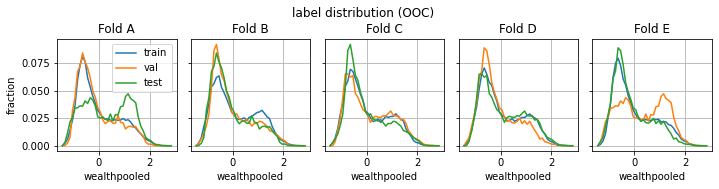

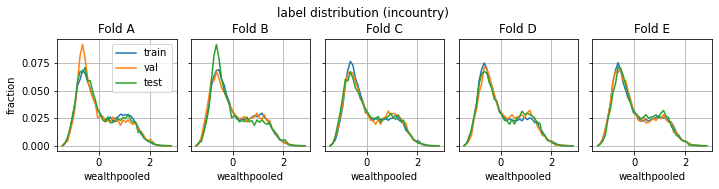

In [69]:
plot_label_hists(labels, ooc_folds, title='label distribution (OOC)')
plot_label_hists(labels, incountry_folds, title='label distribution (incountry)')

## Urban v. Rural

In [70]:
def plot_urban_by_fold(urban, folds, title=None):
    '''
    Args
    - urban: np.array, shape [N], type bool
    - folds: dict, folds[f][split] is a np.array of indices
    - title: str, figure title
    '''
    fig, axs = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(7, 2.5))
    for f, ax in zip(FOLDS, axs.flat):
        data = [urban[folds[f][split]].mean() for split in SPLITS]
        ax.bar([0, 1, 2], data, width=0.8)

        # add x-tick labels
        plt.setp(ax, xticks=[0, 1, 2], xticklabels=SPLITS)

        ax.grid(True, axis='y')
        ax.set_title(f'Fold: {f}')

    axs[0].set_ylabel('urban fraction')
    if title is not None:
        fig.suptitle(title, y=1.03)
    fig.tight_layout()

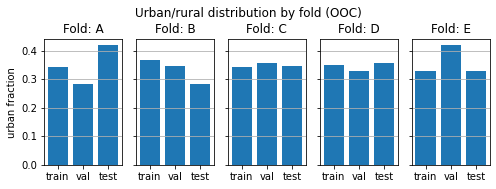

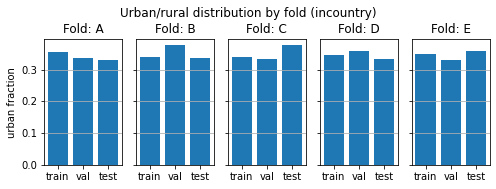

In [71]:
plot_urban_by_fold(df['urban'].values, ooc_folds, title='Urban/rural distribution by fold (OOC)')
plot_urban_by_fold(df['urban'].values, incountry_folds, title='Urban/rural distribution by fold (incountry)')

## Nightlights

In [72]:
def plot_nl_by_fold(df, folds, col, dmsp, title=None):
    '''
    Args
    - df: pd.DataFrame
    - folds: dict, folds[f][split] is a np.array of indices
    - col: str, one of ['nl_mean', 'nl_center']
    - dmsp: bool
    - title: str, figure title
    '''
    fig, axs = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(10, 2.5))
    bin_edges = np.linspace(start=df[col].min()-0.1, stop=df[col].max()+0.1, num=100)
    bin_centers = np.convolve(bin_edges, [.5, .5], mode='valid')

    for f, ax in zip(FOLDS, axs.flat):
        for split in SPLITS:
            nls_df = df.loc[folds[f][split], [col, 'year']]
            if dmsp:
                nl_hist, _ = np.histogram(
                    nls_df.loc[nls_df['year'] < 2012, col],
                    bins=bin_edges)
            else:
                nl_hist, _ = np.histogram(
                    nls_df.loc[nls_df['year'] >= 2012, col],
                    bins=bin_edges)
            ax.plot(bin_centers, nl_hist / np.sum(nl_hist), label=split)
        ax.set_xlabel(col)
        ax.set_yscale('log')
        ax.set_title(f'Fold {f}')
        ax.grid(True)

    axs[0].legend()
    axs[0].set_ylabel('fraction')
    if title is not None:
        fig.suptitle(title, y=1.03)
    fig.tight_layout()

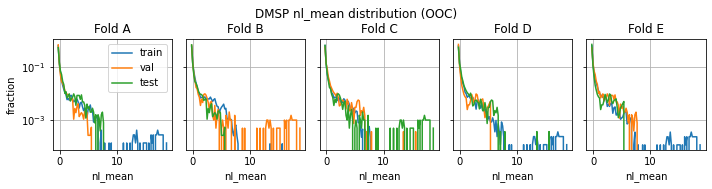

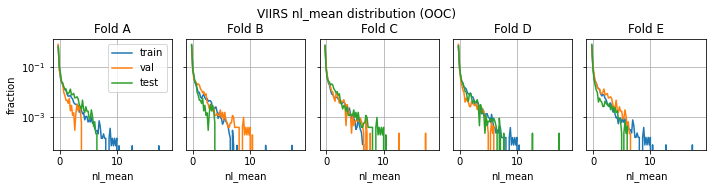

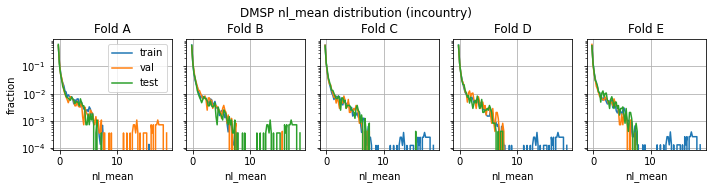

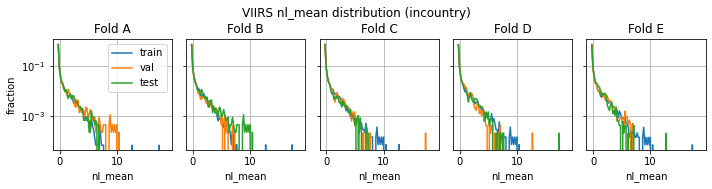

In [73]:
plot_nl_by_fold(df, ooc_folds, col='nl_mean', dmsp=True, title='DMSP nl_mean distribution (OOC)')
plot_nl_by_fold(df, ooc_folds, col='nl_mean', dmsp=False, title='VIIRS nl_mean distribution (OOC)')
plot_nl_by_fold(df, incountry_folds, col='nl_mean', dmsp=True, title='DMSP nl_mean distribution (incountry)')
plot_nl_by_fold(df, incountry_folds, col='nl_mean', dmsp=False, title='VIIRS nl_mean distribution (incountry)')

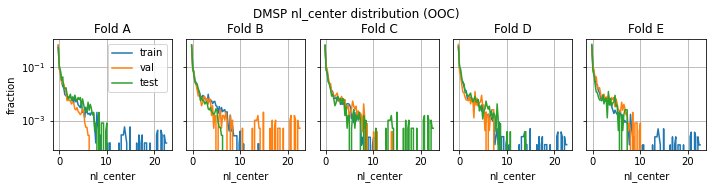

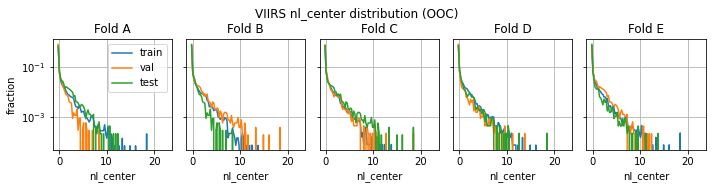

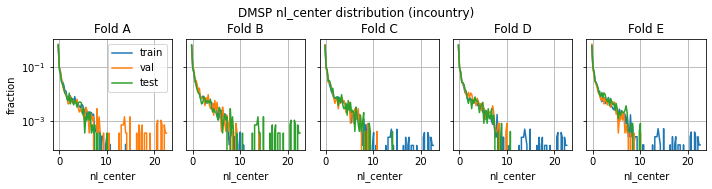

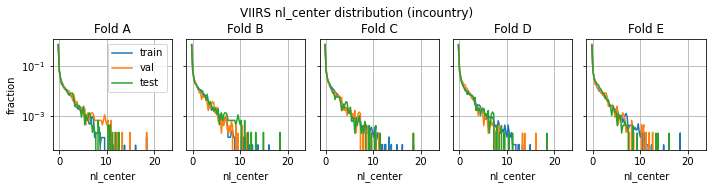

In [74]:
plot_nl_by_fold(df, ooc_folds, col='nl_center', dmsp=True, title='DMSP nl_center distribution (OOC)')
plot_nl_by_fold(df, ooc_folds, col='nl_center', dmsp=False, title='VIIRS nl_center distribution (OOC)')
plot_nl_by_fold(df, incountry_folds, col='nl_center', dmsp=True, title='DMSP nl_center distribution (incountry)')
plot_nl_by_fold(df, incountry_folds, col='nl_center', dmsp=False, title='VIIRS nl_center distribution (incountry)')

In [75]:
def nl_boxplots_by_fold(df, folds, col, dmsp, title=None):
    '''
    Args
    - df: pd.DataFrame
    - folds: dict, folds[f][split] is a np.array of indices
    - col: str, one of ['nl_mean', 'nl_center']
    - dmsp: bool
    - title: str, figure title
    '''
    fig, axs = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(7, 2.5))
    for f, ax in zip(FOLDS, axs.flat):
        data = []
        for split in SPLITS:
            nls_df = df.loc[folds[f][split], [col, 'year']]
            if dmsp:
                data.append(nls_df.loc[nls_df['year'] < 2012, col])
            else:
                data.append(nls_df.loc[nls_df['year'] >= 2012, col])
        ax.boxplot(data, patch_artist=True, widths=0.8)

        # add x-tick labels
        plt.setp(ax, xticks=[1, 2, 3], xticklabels=SPLITS)

        ax.set_title(f'Fold {f}')
        ax.grid(True, axis='y')

    axs[0].set_ylabel(col)
    if title is not None:
        fig.suptitle(title, y=1.03)
    fig.tight_layout()

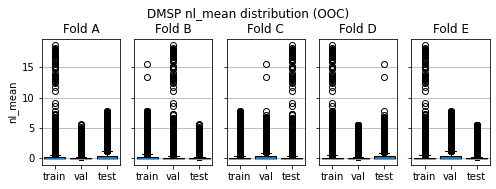

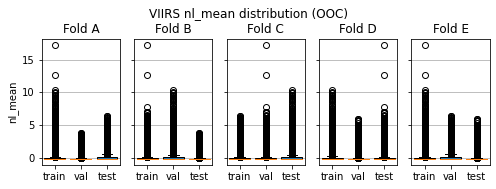

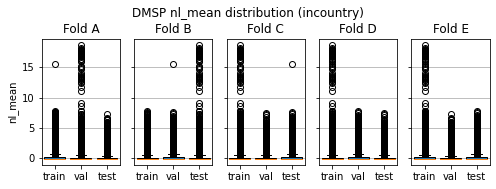

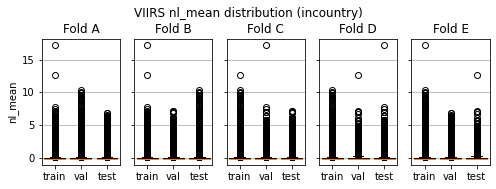

In [76]:
nl_boxplots_by_fold(df, ooc_folds, col='nl_mean', dmsp=True, title='DMSP nl_mean distribution (OOC)')
nl_boxplots_by_fold(df, ooc_folds, col='nl_mean', dmsp=False, title='VIIRS nl_mean distribution (OOC)')
nl_boxplots_by_fold(df, incountry_folds, col='nl_mean', dmsp=True, title='DMSP nl_mean distribution (incountry)')
nl_boxplots_by_fold(df, incountry_folds, col='nl_mean', dmsp=False, title='VIIRS nl_mean distribution (incountry)')

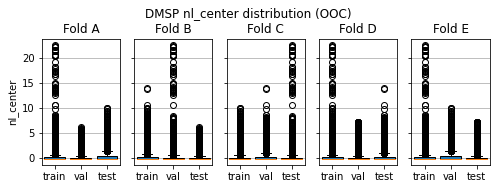

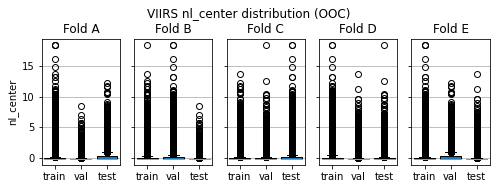

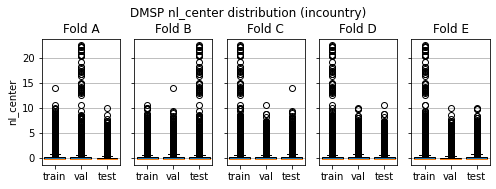

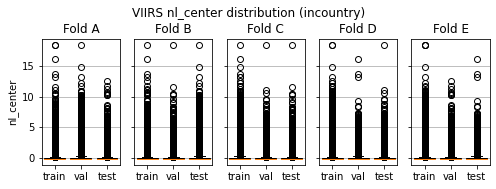

In [77]:
nl_boxplots_by_fold(df, ooc_folds, col='nl_center', dmsp=True, title='DMSP nl_center distribution (OOC)')
nl_boxplots_by_fold(df, ooc_folds, col='nl_center', dmsp=False, title='VIIRS nl_center distribution (OOC)')
nl_boxplots_by_fold(df, incountry_folds, col='nl_center', dmsp=True, title='DMSP nl_center distribution (incountry)')
nl_boxplots_by_fold(df, incountry_folds, col='nl_center', dmsp=False, title='VIIRS nl_center distribution (incountry)')

# All-Zero NL

In [78]:
MEANS = dataset_constants.MEANS_DICT[DATASET]
STD_DEVS = dataset_constants.STD_DEVS_DICT[DATASET]

DMSP_ZERO = np.float32(-MEANS['DMSP'] / STD_DEVS['DMSP'])
VIIRS_ZERO = np.float32(-MEANS['VIIRS'] / STD_DEVS['VIIRS'])

In [79]:
zeros_df = pd.DataFrame({
    'DMSP': [DMSP_ZERO,
             df.loc[dmsp_mask, 'nl_center'].min(),
             df.loc[dmsp_mask, 'nl_mean'].min()],
    'VIIRS': [VIIRS_ZERO,
             df.loc[viirs_mask, 'nl_center'].min(),
             df.loc[viirs_mask, 'nl_mean'].min()],
}, index=['True 0', 'min nls_center', 'min nls_mean'])

with pd.option_context('precision', 9):
    display(zeros_df)

,DMSP,VIIRS
True 0,-0.173862472,-0.229002908
min nls_center,-0.173862472,-0.229002908
min nls_mean,-0.173862472,-0.229002938


,count,mean,std,min,25%,50%,75%,max
"label, when DMSP is all-zero",6903.0,-0.59592,0.418975,-1.381986,-0.858343,-0.672444,-0.435451,2.635016


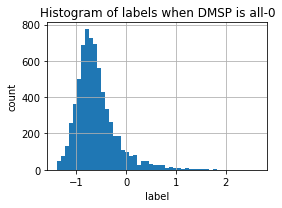

In [80]:
dmsp_zero_mask = dmsp_mask & (nls_mean == DMSP_ZERO)
zeros_label_df = pd.DataFrame({
    'label, when DMSP is all-zero': labels[dmsp_zero_mask]
})
display(zeros_label_df.describe().T)

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.hist(labels[dmsp_zero_mask], bins=50)
ax.set(xlabel='label', ylabel='count', title='Histogram of labels when DMSP is all-0')
ax.grid(True)
fig.tight_layout()

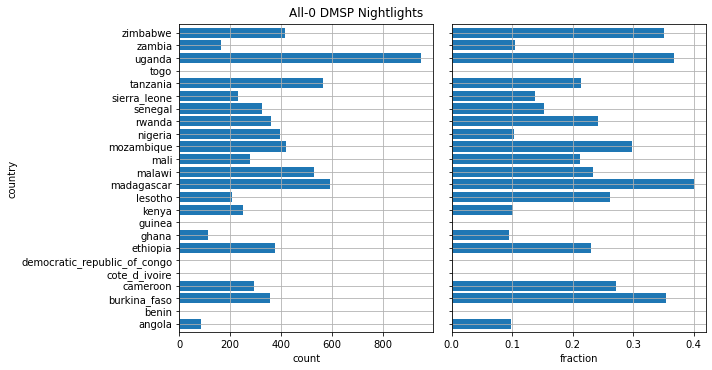

In [85]:
df['zero_nl'] = dmsp_zero_mask
zero_nl_counts = df.groupby('country')['zero_nl'].sum().astype(int)
zero_nl_frac = zero_nl_counts / df.groupby('country').size()

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
zero_nl_counts.plot.barh(width=0.8, ax=axs[0], grid=True)
zero_nl_frac.plot.barh(width=0.8, ax=axs[1], grid=True)
axs[0].set_xlabel('count')
axs[1].set_xlabel('fraction')
fig.suptitle('All-0 DMSP Nightlights', y=1.02)
fig.tight_layout()

# Visualize Images

In [86]:
tfrecord_paths = np.asarray(batcher.get_tfrecord_paths(dataset=DATASET, split='all'))
K = 1

benin_2012
benin_2017
democratic_republic_of_congo_2013
guinea_2012
guinea_2018
kenya_2003
kenya_2008
kenya_2014
kenya_2015
malawi_2010
malawi_2017
malawi_2012
malawi_2014
madagascar_2008
madagascar_2011
madagascar_2013
malawi_2004
malawi_2015
nigeria_2010
madagascar_2016
nigeria_2003
nigeria_2008
nigeria_2013
nigeria_2018
nigeria_2015
rwanda_2010
rwanda_2015
rwanda_2019
senegal_2008
senegal_2015
senegal_2016
senegal_2017
senegal_2018
senegal_2019
senegal_2010
senegal_2012
senegal_2014
sierra_leone_2008
sierra_leone_2016
sierra_leone_2013
sierra_leone_2019
tanzania_2003
tanzania_2007
tanzania_2017
tanzania_2010
tanzania_2012
tanzania_2015
togo_2017
togo_2013
uganda_2006
uganda_2016
uganda_2018
uganda_2009
uganda_2011
uganda_2014
zimbabwe_2005
zimbabwe_2010
zimbabwe_2015
burkina_faso_2010
burkina_faso_2017
burkina_faso_2014
cote_d_ivoire_2012
ghana_2008
ghana_2014
ghana_2016
ghana_2019
lesotho_2009
lesotho_2014
zambia_2013
zambia_2007
zambia_2018
angola_2011
angola_2015
cameroon_2004
ca

In [87]:
def get_images(tfrecord_paths):
    '''
    Args
    - tfrecord_paths: list of str, length N <= 32, paths of TFRecord files

    Returns: np.array, shape [N, 224, 224, 8], type float32
    '''
    init_iter, batch_op = batcher.Batcher(
        tfrecord_files=tfrecord_paths,
        dataset=DATASET,
        batch_size=32,
        ls_bands='ms',
        nl_band='merge',
        label_name='wealthpooled',
        shuffle=False,
        augment=False,
        negatives='zero',
        normalize=True).get_batch()
    with tf.Session() as sess:
        sess.run(init_iter)
        images = sess.run(batch_op['images'])
    return images

In [88]:
def plot_images_by_wealth(indices, images, labels, years, locs,
                          country_labels, countries, title_str):
    '''
    Args
    - indices: np.array, shape [K], type int64
    - images: np.array, shape [K, 224, 224, 8]
    - labels: np.array, shape [N], type float32
    - years: np.array, shape [N], type int32
    - locs: np.array, shape [N, 2], type float32
    - country_labels: np.array, shape [N], type int32
    - countries: list of str, names of countries corresponding to country labels
    - title_str: format str, contains variables [k, label, country, year, lat, lon]
    '''
    for k, i in enumerate(indices):
        img = images[k]
        label, year, loc = labels[i], years[i], locs[i]
        lat, lon = tuple(loc)
        country = countries[country_labels[i]]
        title = title_str.format(k=k+1, label=label, country=country, year=year, lat=lat, lon=lon)
        print(title)
        band_order = list(BAND_ORDER)  # make a copy
        band_order[-1] = 'DMSP' if year < 2012 else 'VIIRS'
        plot_image_by_band(img, band_order, nrows=1, title=None, rgb='merge')

## Highest wealth



Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.
1-th highest wealth: 2.649848, loc = nigeria 2010 (6.990041, 3.695853)


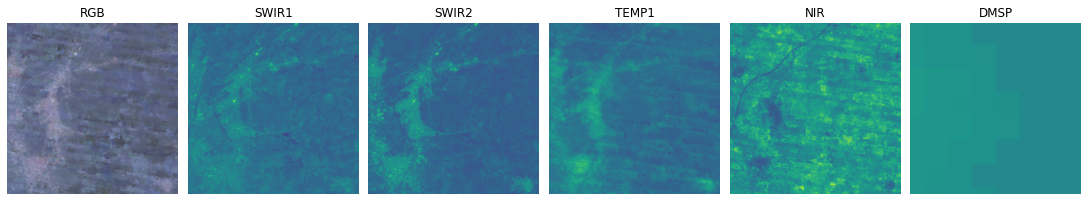

In [89]:

indices = np.argsort(labels)[::-1][:K]  # indices of K wealthiest images
images = get_images(tfrecord_paths[indices])
title_str = '{k}-th highest wealth: {label:.06f}, loc = {country} {year} ({lat:.06f}, {lon:.06f})'
plot_images_by_wealth(indices, images, labels, years, locs,
                      country_labels=country_labels,
                      countries=COUNTRIES,
                      title_str=title_str)

## Lowest wealth

1-th lowest wealth: -1.382175, loc = kenya 2014 (1.179216, 37.148441)


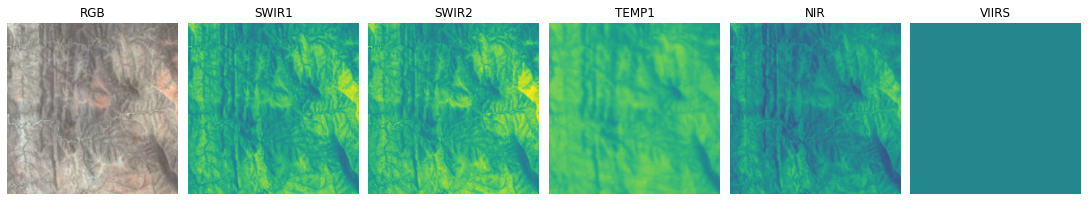

In [90]:
indices = np.argsort(labels)[:K]  # indices of K poorest images
images = get_images(tfrecord_paths[indices])
title_str = '{k}-th lowest wealth: {label:.06f}, loc = {country} {year} ({lat:.06f}, {lon:.06f})'
plot_images_by_wealth(indices, images, labels, years, locs,
                      country_labels=country_labels,
                      countries=values,
                      title_str=title_str)